In [ ]:
import math
import matplotlib.pyplot as plt

def sigmoid (x):
  return(1/(1+math.exp(-1*x)))

def ReLu (x):
  if (x>0):
    return x
  else : return 0

def gradient (x):
  return (1-sigmoid(x))*sigmoid(x)

def ReLu_diff (x):
  if (x>0):
    return 1
  else : return 0


def foward_propagation(pixel_input,weight_input,weight_output,bias_input,bias_output):
  #function input is the following :
  #pixel_input is an 1*9 array 
  #weight_input and weight_output is an 2*9 array
  #bias_input is an 1*2 array
  #bias_output is an 1*9 array 

  #function output is the following
  #pixel_output is an 1*9 array

  #encoding side
  encoded_1 = 0
  encoded_2 = 0
  for iteration in pixel_input:
    encoded_1 = encoded_1 + pixel_input[iteration]*weight_input[0][iteration] + bias_input[0]
    encoded_2 = encoded_2 + pixel_input[iteration]*weight_input[1][iteration] + bias_input[1]  
  #passing through activation function (ReLu) and rewriting encoded_1 and encoded_2 value
  encoded_1_activated = ReLu(encoded_1)
  encoded_2_activated = ReLu(encoded_2)

    #reconstruction side
  pixel_output = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
  non_activated_output = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

  for iteration in range (0,9):
    non_activated_output[iteration] = encoded_1_activated*weight_output[0][iteration] + encoded_2_activated*weight_output[1][iteration]+ bias_output[iteration]
    pixel_output[iteration] = sigmoid(non_activated_output[iteration])

  return pixel_output,encoded_1,encoded_2,non_activated_output,encoded_1_activated,encoded_2_activated

def backward_propagation(pixel_input,weight_input,weight_output,bias_input,bias_output):

    pixel_output,encoded_1,encoded_2,non_activated_output,encoded_1_activated,encoded_2_activated = foward_propagation(pixel_input,weight_input,weight_output,bias_input,bias_output)
    error_output = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    differential_error_output = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    d_bias_output = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    d_weight_output = [[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]
    error_middle_layer = [0.0,0.0]
    d_weight_input = [[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]
    d_bias_input = [0.0,0.0]
    learning_rate = 1.25


    for iteration in range (0,9):
      error_output[iteration] = -pixel_input[iteration]*(1-pixel_output[iteration])+(1-pixel_output[iteration])*pixel_output[iteration] #calculating error
      differential_error_output[iteration] = pixel_output[iteration]*(1-pixel_output[iteration]) #calculating differrential error(idk what this for)
      d_weight_output[0][iteration] = error_output[iteration]*encoded_1_activated #calculating output weight error 1
      d_weight_output[1][iteration] = error_output[iteration]*encoded_2_activated #calculating output weight error 2
      d_bias_output[iteration] = error_output[iteration] #calculating output bias differential
      error_middle_layer[0] = error_middle_layer[0] + error_output[iteration]*weight_output[0][iteration]*ReLu_diff(encoded_1) #calculating middle layer error
      error_middle_layer[1] = error_middle_layer[1] + error_output[iteration]*weight_output[1][iteration]*ReLu_diff(encoded_2) #calculating middle layer error
      d_weight_input[0][iteration] = error_middle_layer[0]*pixel_input[iteration] #calculating weight input differential
      d_weight_input[1][iteration] = error_middle_layer[1]*pixel_input[iteration] #calculating weight input differential
      d_bias_input[0] = error_middle_layer[0]
      d_bias_input[1] = error_middle_layer[1]

    updated_weight_input = [[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]
    updated_weight_output = [[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]
    updated_bias_output = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    updated_bias_input = [0.0,0.0]

    for iteration in range(0,9):
      updated_weight_output[0][iteration] = weight_output[0][iteration]- learning_rate*d_weight_output[0][iteration]
      updated_weight_output[1][iteration] = weight_output[1][iteration]- learning_rate*d_weight_output[1][iteration]
      updated_weight_input[0][iteration] = weight_input[0][iteration]- learning_rate*d_weight_input[0][iteration]
      updated_weight_input[1][iteration] = weight_input[1][iteration]- learning_rate*d_weight_input[1][iteration]
      updated_bias_output[iteration] = bias_output[iteration]- learning_rate*d_bias_output[iteration]
    
    updated_bias_input[0] = bias_input[0]-learning_rate*d_bias_input[0]
    updated_bias_input[1] = bias_input[1]-learning_rate*d_bias_input[1]

    return updated_weight_output,updated_weight_input,updated_bias_input,updated_bias_output,pixel_output,encoded_1_activated

def cross_entropy_error(data_in,data_out): #cross entropy for measurement
  accumulator = 0
  for i in range (9):
    accumulator = accumulator + (data_in[i]*math.log(data_out[i],10)+((1-data_in[i])*math.log((1-data_out[i]),10)))
  accumulator = -(accumulator/9)
  return accumulator

#main section

training_number = 10000
error_history =[]
temporary_error_history = 0
x_scale = []


#declaration and initial 
#pixel_input,weight_input,weight_output,bias_input,bias_output
pixel_input = [1,0,1,0,1,0,1,0,1]
pixel_output = [0,0,0,0,0,0,0,0,0]
weight_input = [[1.3725,0.2184,1.1919,-0.3476,1.9446,0.0867,1.4450,-0.0088,1.3885],[0.8603,1.6803,0.4377,2.2810,-1.0389,2.0551,0.1210,1.7158,0.1502]]
weight_output = [[0.3910,0.0356,0.5649,0.2035,0.3206,0.3766,0.1841,0.1040,0.4549],[0.1959,0.3785,0.9305,0.7602,0.7708,0.5967,0.7916,0.8103,0.9806]]
bias_input = [-0.5,-0.5]
bias_output =  [-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5]

for training in range(0,training_number):
  weight_output,weight_input,bias_input,bias_output,pixel_output,test = backward_propagation(pixel_input,weight_input,weight_output,bias_input,bias_output)
  temporary_error_history = cross_entropy_error(pixel_input,pixel_output)
  error_history.append(math.log(temporary_error_history,10))
  x_scale.append(training)


plt.plot(x_scale,error_history, color="red")  
plt.show()
plt.close()
#print(pixel_output)
#print(weight_input)
#print(test)


In [71]:
# 0_0000000_00000000 (sign_exp_fraction)
# Converting floating point to 16-bit representation
def float16_to_bin(num):
   b = ['0'] * 16
   dec_num = int(num)
   exp = 8; frac = 7
   float_num = num - dec_num

   if (num >= 0):b[15] = '0'
   else: b[15] = '1'

   while(dec_num > 0):
      if (dec_num % 2 == 0) : b[exp] = '0'
      else : b[exp] = '1'
      #print(dec_num)
      exp += 1
      dec_num //= 2
   
   for i in range (7, 0, -1):
      float_num *= 2
      if (float_num == 1): 
         b[frac] = '1'
         break
      elif (float_num > 1):
         b[frac] = '1'
         float_num = float_num - int(float_num)
      else:
         b[frac] = '0'
      frac -= 1
   
   result = ""

   for i in range(15,0,-1):
      if (i == 15 or i == 8): result += str(b[i]) + '_'
      else: result += str(b[i])
   
   return result


# result = float16_to_bin(8.25)
# for i in range(15,0,-1):
#    if (i == 15 or i == 8): print(result[i], end="_")
#    else: print(result[i], end="")
print(float16_to_bin(8.25))

0_0001000_0100000


0.03125   448.0


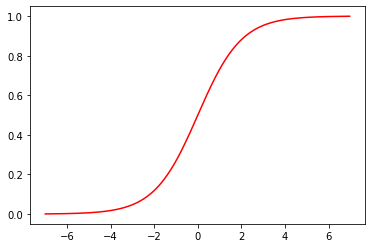

[0.0009110511944006454, 0.0009399438806628558, 0.0009697519677825861, 0.0010005044009099887, 0.0010322310367548194, 0.001064962672055945, 0.001098731072924643, 0.0011335690050875116, 0.0011695102650555148, 0.001206589712246389, 0.0012448433020883745, 0.0012843081201339695, 0.0013250224172131609, 0.0013670256456563559, 0.001410358496618023, 0.0014550629385328433, 0.0015011822567369917, 0.00154876109428798, 0.0015978454940173438, 0.0016484829418512883, 0.001700722411435288, 0.0017546144100994867, 0.0018102110262026483, 0.0018675659778932803, 0.0019267346633274757, 0.0019877742123839116, 0.002050743539917378, 0.002115703400593114, 0.0021827164453451808, 0.00225184727950302, 0.0023231625226312826, 0.0023967308701289603, 0.0024726231566347743, 0.002550912421286719, 0.0026316739748845795, 0.0027149854690051763, 0.0028009269671209736, 0.002889581017773627, 0.0029810327298548972, 0.0030753698500482333, 0.0031726828424851893, 0.003273064970671631, 0.0033766123817395004, 0.003483424193080668, 0.

,Floating Point,Binary
0,0.000911,0_0000000_0000000
1,0.000940,0_0000000_0000000
2,0.000970,0_0000000_0000000
3,0.001001,0_0000000_0000000
4,0.001032,0_0000000_0000000
...,...,...
443,0.998935,0_0000000_1111111
444,0.998968,0_0000000_1111111
445,0.998999,0_0000000_1111111
446,0.999030,0_0000000_1111111


In [83]:
import math
import matplotlib.pyplot as plt
import pandas as pd

def sigmoid (x):
  return(1/(1+math.exp(-1*x)))


step = 0.5**5
print(f"{step}   {14 / step}")
high_x_range = 7
low_x_range = -7

output = []
bin_out = []
x = []
accumulator_2 = 0

accumulator = low_x_range
while (accumulator < high_x_range):
   output.append(sigmoid(accumulator))
   #print(output)
   x.append(accumulator)
   accumulator = accumulator+step
   accumulator_2 = accumulator_2+1
   bin_out.append(float16_to_bin(sigmoid(accumulator)))
   #bin_out += float16_to_bin(sigmoid(accumulator)) + ','

#print(bin(0.1))

plt.plot(x,output, color="red")  
plt.show()
print(output)
print(bin_out)

data = {'Floating Point' : output,
        'Binary' : bin_out}

df = pd.DataFrame(data)
df

In [35]:
import struct
import numpy
number = 20.21
print(numpy.float16(number))
s = struct.pack('!f', numpy.float16(number))
b = ''.join(format(c, '08b') for c in s)
# for c in s:
#    print(c)
print(len(b))
print(b)

# def binary(num):
#     return ''.join('{:0>8b}'.format(c) for c in struct.pack('!f', num))

#print(binary(0.2))

20.2
32
01000001101000011010000000000000


0_0001000_0100000